In [1]:
test_data = [
    # get_recommendation intent
    {"text": "Can you recommend a movie similar to Toy Story?", "intent": "get_recommendation", "entities": {"movie_title": "Toy Story"}},
    {"text": "Suggest some movies like The Matrix.", "intent": "get_recommendation", "entities": {"movie_title": "The Matrix"}},
    {"text": "Recommend a movie like Inception.", "intent": "get_recommendation", "entities": {"movie_title": "Inception"}},
    {"text": "I loved Titanic, what should I watch next?", "intent": "get_recommendation", "entities": {"movie_title": "Titanic"}},
    {"text": "What's a good movie like Avatar?", "intent": "get_recommendation", "entities": {"movie_title": "Avatar"}},
    {"text": "Give me some recommendations similar to Shrek.", "intent": "get_recommendation", "entities": {"movie_title": "Shrek"}},
    {"text": "If I enjoyed Finding Nemo, what else might I like?", "intent": "get_recommendation", "entities": {"movie_title": "Finding Nemo"}},
    {"text": "What are some movies similar to Jurassic Park?", "intent": "get_recommendation", "entities": {"movie_title": "Jurassic Park"}},
    {"text": "Can you suggest movies like The Lion King?", "intent": "get_recommendation", "entities": {"movie_title": "The Lion King"}},
    {"text": "Recommend me films similar to The Dark Knight.", "intent": "get_recommendation", "entities": {"movie_title": "The Dark Knight"}},
    
    # search_by_genre intent
    {"text": "Show me some action movies.", "intent": "search_by_genre", "entities": {"genre": "action"}},
    {"text": "I want to watch a comedy movie.", "intent": "search_by_genre", "entities": {"genre": "comedy"}},
    {"text": "Do you have any recommendations for drama movies?", "intent": "search_by_genre", "entities": {"genre": "drama"}},
    {"text": "Can you suggest any good horror movies?", "intent": "search_by_genre", "entities": {"genre": "horror"}},
    {"text": "I'm in the mood for a romantic film.", "intent": "search_by_genre", "entities": {"genre": "romantic"}},
    {"text": "Recommend some sci-fi movies.", "intent": "search_by_genre", "entities": {"genre": "sci-fi"}},
    {"text": "What are some popular thriller movies?", "intent": "search_by_genre", "entities": {"genre": "thriller"}},
    {"text": "Show me some great animated films.", "intent": "search_by_genre", "entities": {"genre": "animated"}},
    {"text": "I'd like to watch a documentary.", "intent": "search_by_genre", "entities": {"genre": "documentary"}},
    {"text": "Suggest some good fantasy movies.", "intent": "search_by_genre", "entities": {"genre": "fantasy"}},
    
    # get_movie_details intent
    {"text": "Tell me about the movie Inception.", "intent": "get_movie_details", "entities": {"movie_title": "Inception"}},
    {"text": "I want information about Gladiator.", "intent": "get_movie_details", "entities": {"movie_title": "Gladiator"}},
    {"text": "Details about The Godfather, please.", "intent": "get_movie_details", "entities": {"movie_title": "The Godfather"}},
    {"text": "Can you give me the plot of The Matrix?", "intent": "get_movie_details", "entities": {"movie_title": "The Matrix"}},
    {"text": "What is Pulp Fiction about?", "intent": "get_movie_details", "entities": {"movie_title": "Pulp Fiction"}},
    {"text": "Provide details on The Shawshank Redemption.", "intent": "get_movie_details", "entities": {"movie_title": "The Shawshank Redemption"}},
    {"text": "I'd like to know more about Forrest Gump.", "intent": "get_movie_details", "entities": {"movie_title": "Forrest Gump"}},
    {"text": "What's the storyline of Fight Club?", "intent": "get_movie_details", "entities": {"movie_title": "Fight Club"}},
    {"text": "Tell me the details of The Lord of the Rings.", "intent": "get_movie_details", "entities": {"movie_title": "The Lord of the Rings"}},
    {"text": "Can you summarize The Avengers?", "intent": "get_movie_details", "entities": {"movie_title": "The Avengers"}}
]


In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Classification Report for Intent Recognition:
                    precision    recall  f1-score   support

 get_movie_details       1.00      1.00      1.00         1
get_recommendation       1.00      1.00      1.00         1
   search_by_genre       1.00      1.00      1.00         1

          accuracy                           1.00         3
         macro avg       1.00      1.00      1.00         3
      weighted avg       1.00      1.00      1.00         3



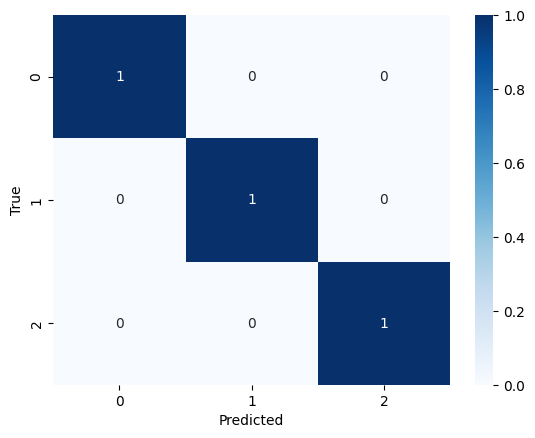

Entity Extraction Results:
True: {'movie_title': 'Toy Story'} | Predicted: {'movie_title': 'Toy Story'}
True: {'genre': 'action'} | Predicted: {'genre': 'action'}
True: {'movie_title': 'Inception'} | Predicted: {'movie_title': 'Inception'}


In [6]:
import requests
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate intent recognition
def evaluate_intent_recognition(test_data, rasa_server_url):
    true_intents = []
    predicted_intents = []

    for message in test_data:
        response = requests.post(f"{rasa_server_url}/model/parse", json={"text": message["text"]})
        response_data = response.json()
        
        true_intents.append(message["intent"])
        predicted_intents.append(response_data["intent"]["name"])

    print("Classification Report for Intent Recognition:")
    print(classification_report(true_intents, predicted_intents))

    cm = confusion_matrix(true_intents, predicted_intents)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to evaluate entity extraction
def evaluate_entity_extraction(test_data, rasa_server_url):
    true_entities = []
    predicted_entities = []

    for message in test_data:
        response = requests.post(f"{rasa_server_url}/model/parse", json={"text": message["text"]})
        response_data = response.json()
        
        true_entities.append(message["entities"])
        predicted_entities.append({entity["entity"]: entity["value"] for entity in response_data["entities"]})

    print("Entity Extraction Results:")
    for true, pred in zip(true_entities, predicted_entities):
        print(f"True: {true} | Predicted: {pred}")

# Rasa server URL
rasa_server_url = "http://localhost:5005"

# Evaluate intent recognition
evaluate_intent_recognition(test_data, rasa_server_url)

# Evaluate entity extraction
evaluate_entity_extraction(test_data, rasa_server_url)
